# DASC 512 - 13 - Discrete Distributions

***

First, as always, let's import our packages. Note that we'll also want to add scipy.stats to the list, as we'll use it extensively.

In [249]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
sns.set_style('whitegrid')

## Discrete Probability Distributions

### Discrete Uniform Distribution

In [250]:
# Graphing the pmf and pdf of a discrete uniform distribution
n = 6
pmf = [1/n] * n
pmf_x = range(1,n+1,1)
cdf_x = range(0,n+2,1)
cdf = [min(1, 1/n * max(0,(x-1))) for x in cdf_x]

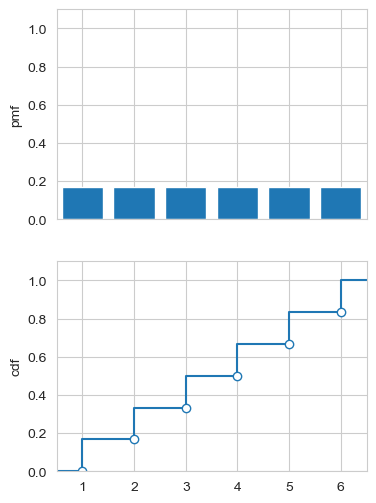

In [251]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(4,6),sharey=True,sharex=True)
ax1.bar(x=pmf_x, height=pmf)
ax1.set_ylim(0,1.1)
ax1.set_ylabel('pmf')
ax2.step(x=cdf_x, y=cdf, where='pre', marker='o', markerfacecolor='white')
ax2.set_xlim(0.5,n+0.5)
ax2.set_ylabel('cdf')
plt.show()

Feel free to take and/or modify the below function to help you get a sense of a discrete distribution.
Properly plotting a step function is painful.

In [252]:
def plot_pmfcdf(x, y, figsize=(4,4)):
    '''
    This function creates a figure containing two axes that plot the probability 
    mass function and cumulative distribution function of a discrete distribution.
    
    Inputs:
    x : The numerical values that the random variable may take with probability > 0
        This should be presented as a list or array.
    y : The probability values (pmf) associated with x, in the same order as x
        Again, this should be presented as a list or array.
    figsize : Sets the figure size. Defaults to 4x4. 
        This should be a tuple of length 2.
        
    Returns:
    fig : A figure object with two axes to further refine, display, or save.
    '''
    fig, ax = plt.subplots(nrows=2,figsize=figsize, gridspec_kw={'height_ratios': [1, 3]})
    ax[0].bar(x=x, height=y)
    ax[0].set_xlim([min(x)-0.5, max(x)+0.5])
    ax[0].set_ylim([-0.05,max(y)+0.05])
    ax[0].set_ylabel(r'$f(x)$')
    ax[0].axhline(0, color='gray')
    
    xcdf = [x[0]-1] + x + [x[len(x)-1]+1]
    cdf = [0] + [sum(y[:ii+1]) for ii in range(len(x))] + [1]
    for ii in range(len(xcdf)-1):
        ax[1].plot([xcdf[ii],xcdf[ii]], [cdf[ii-1],cdf[ii]], ls=':',color='C0')
        ax[1].plot([xcdf[ii],xcdf[ii+1]], [cdf[ii],cdf[ii]], color='C0')
    ax[1].scatter(x=x, y=cdf[:len(x)], marker='o', color='white', edgecolor='C0')
    ax[1].scatter(x=x, y=cdf[1:-1], color='C0')
    ax[1].set_xlim(ax[0].get_xlim())
    ax[1].set_ylim([-0.05,1.05])
    ax[1].set_ylabel(r'$F(x)$')
    fig.tight_layout()
    return fig

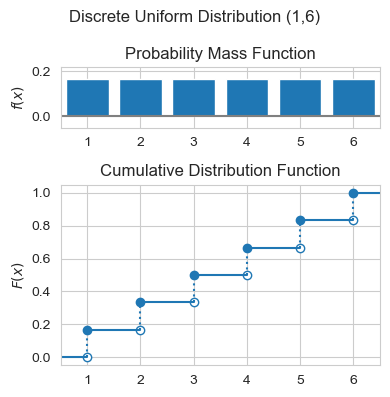

In [253]:
fig = plot_pmfcdf(x=list(pmf_x), y=pmf)
ax = fig.axes
ax[0].set_title('Probability Mass Function')
ax[1].set_title('Cumulative Distribution Function')
fig.suptitle('Discrete Uniform Distribution (1,6)')
fig.tight_layout()
plt.show()

Now let's use the scipy.stats package!

In [254]:
# Defining the distribution
dist = stats.randint(low=1, high=7, loc=0)  # Note high is excluded like with range

In [255]:
# pmf
dist.pmf(k=2)

0.16666666666666666

In [256]:
# cdf
dist.cdf(x=2)  # Note that cdfs can take non-integer values, so it has input of x, not k.

0.3333333333333333

In [257]:
# ppf
dist.ppf(q=0.25)

2.0

In [258]:
# sf
dist.sf(x=2)

0.6666666666666667

In [259]:
# isf
dist.isf(q=0.75)

2.0

In [260]:
# Expected value
dist.expect()

3.5

In [261]:
# Variance
dist.var()

2.9166666666666665

In [262]:
# Median (same as ppf(q=0.5))
dist.median()

3.0

In [263]:
# Random sample from distribution
dist.rvs(size=10)

array([6, 6, 4, 2, 4, 5, 3, 4, 3, 5])

In [264]:
# Note that we can implement the location family easily. Scale family does not apply here.
dist = stats.randint(low=1, high=7, loc=5)
print(dist.expect())
print(dist.var())

8.5
2.9166666666666665


### Bernoulli Distribution

In [265]:
dist = stats.bernoulli(p=0.3)

In [266]:
# Probability of Success
dist.pmf(k=1)

0.3

In [267]:
# Probability of Failure
dist.pmf(k=0)

0.7

In [268]:
# All the functions are the same across distributions!
k = 1
x = 1
q = 0.5
print(f'PMF at k={k} is {dist.pmf(k=k)}.')
print(f'CDF at x={x} is {dist.cdf(x=x)}.')
print(f'PPF at q={q} is {dist.ppf(q=q)}.')
print(f'SF at x={x} is {dist.sf(x=x)}.')
print(f'ISF at q={q} is {dist.isf(q=q)}.')
print(f'Expectation is {dist.expect()}.')
print(f'Variance is {dist.var()}.')
print(f'Median is {dist.median()}.')
print(f'A random sample of 10 values is {dist.rvs(size=10)}.')

PMF at k=1 is 0.3.
CDF at x=1 is 1.0.
PPF at q=0.5 is 0.0.
SF at x=1 is 0.0.
ISF at q=0.5 is 0.0.
Expectation is 0.3.
Variance is 0.21.
Median is 0.0.
A random sample of 10 values is [0 0 0 0 1 0 0 0 1 0].


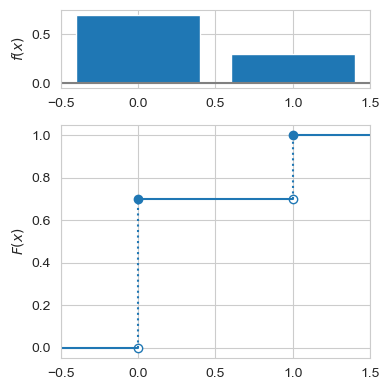

In [269]:
pmf_x = [0,1]
pmf = [dist.pmf(xx) for xx in pmf_x]
plot_pmfcdf(pmf_x, pmf)
plt.show()

### Geometric Distribution

In [270]:
p = 0.3
dist = stats.geom(p=p)

In [271]:
# All the functions are the same across distributions!
k = 2
x = 2
q = 0.9
print(f'PMF at k={k} is {dist.pmf(k=k)}.')
print(f'CDF at x={x} is {dist.cdf(x=x)}.')
print(f'PPF at q={q} is {dist.ppf(q=q)}.')
print(f'SF at x={x} is {dist.sf(x=x)}.')
print(f'ISF at q={q} is {dist.isf(q=q)}.')
print(f'Expectation is {dist.expect()}.')
print(f'Variance is {dist.var()}.')
print(f'Median is {dist.median()}.')
print(f'A random sample of 10 values is {dist.rvs(size=10)}.')

PMF at k=2 is 0.21.
CDF at x=2 is 0.51.
PPF at q=0.9 is 7.0.
SF at x=2 is 0.49.
ISF at q=0.9 is 1.0.
Expectation is 3.3333333333333317.
Variance is 7.777777777777779.
Median is 2.0.
A random sample of 10 values is [1 4 1 3 3 3 6 1 1 2].


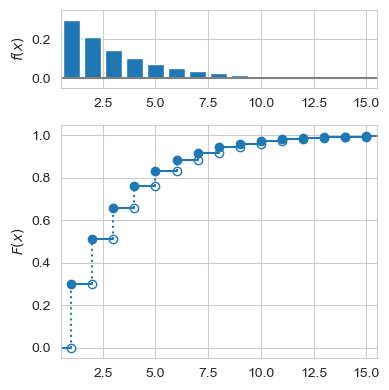

In [272]:
pmf_x = list(range(1,16))
pmf = [dist.pmf(xx) for xx in pmf_x]
plot_pmfcdf(pmf_x, pmf)
plt.show()

### Binomial Distribution

In [273]:
n = 10  # Number of trials
p = 0.3  # Probability of success
dist = stats.binom(n=n, p=p)

In [274]:
# All the functions are the same across distributions!
k = 4
x = 4
q = 0.9
print(f'PMF at k={k} is {dist.pmf(k=k)}.')
print(f'CDF at x={x} is {dist.cdf(x=x)}.')
print(f'PPF at q={q} is {dist.ppf(q=q)}.')
print(f'SF at x={x} is {dist.sf(x=x)}.')
print(f'ISF at q={q} is {dist.isf(q=q)}.')
print(f'Expectation is {dist.expect()}.')
print(f'Variance is {dist.var()}.')
print(f'Median is {dist.median()}.')
print(f'A random sample of 10 values is {dist.rvs(size=10)}.')

PMF at k=4 is 0.2001209489999999.
CDF at x=4 is 0.8497316674000001.
PPF at q=0.9 is 5.0.
SF at x=4 is 0.15026833259999992.
ISF at q=0.9 is 1.0.
Expectation is 2.999999999999998.
Variance is 2.0999999999999996.
Median is 3.0.
A random sample of 10 values is [3 3 3 1 1 4 4 0 1 2].


In [275]:
# The "support" of a distribution is the range of possible values.
dist.support()

(0, 10)

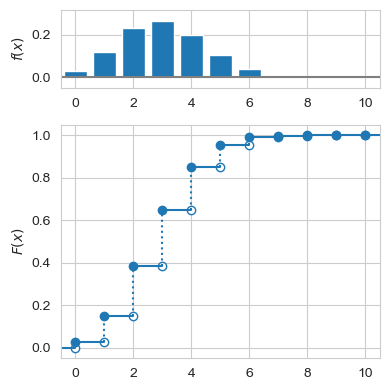

In [276]:
pmf_x = list(range(dist.support()[0], dist.support()[1]+1))
pmf = [dist.pmf(xx) for xx in pmf_x]
plot_pmfcdf(pmf_x, pmf)
plt.show()

### Poisson Distribution

In [277]:
mu = 10  #  (Lambda) Mean number of successes within the interval of interest
dist = stats.poisson(mu = 10)

In [278]:
# All the functions are the same across distributions!
k = 12
x = 12
q = 0.9
print(f'PMF at k={k} is {dist.pmf(k=k)}.')
print(f'CDF at x={x} is {dist.cdf(x=x)}.')
print(f'PPF at q={q} is {dist.ppf(q=q)}.')
print(f'SF at x={x} is {dist.sf(x=x)}.')
print(f'ISF at q={q} is {dist.isf(q=q)}.')
print(f'Expectation is {dist.expect()}.')
print(f'Variance is {dist.var()}.')
print(f'Median is {dist.median()}.')
print(f'A random sample of 10 values is {dist.rvs(size=10)}.')

PMF at k=12 is 0.09478033009176803.
CDF at x=12 is 0.7915564763948745.
PPF at q=0.9 is 14.0.
SF at x=12 is 0.20844352360512552.
ISF at q=0.9 is 6.0.
Expectation is 10.000000000000023.
Variance is 10.0.
Median is 10.0.
A random sample of 10 values is [19  9  5 11  8 13 11  7 11 11].


The support won't help us much for distributions like Poisson and Geometric. They both continue to infinity.

In [279]:
dist.support()

(0, inf)

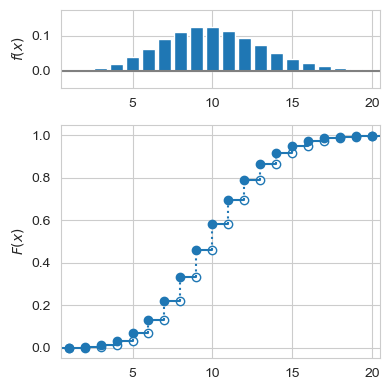

In [280]:
pmf_x = list(range(1,21))
pmf = [dist.pmf(xx) for xx in pmf_x]
plot_pmfcdf(pmf_x, pmf)
plt.show()

# See you next lesson!